<a href="https://colab.research.google.com/github/lizathulya/Data_Analytics_/blob/main/Home_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Problem :
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically.

Below are some of the factors which we think can affect the Loan Approval (dependent variable for this loan prediction problem):

* Salary: Applicants with high income should have more chances of loan approval.

* Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
* Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Loan term: Loan for less time period and less amount should have higher chances of approval.
* EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which we think can affect the target variable, you can come up with many more factors

In [ ]:
import pandas as pd # Imports the pandas library as pd, which is used for data manipulation and analysis
import numpy  as np #  Imports numpy as np, a library used for numerical operations and handling arrays.
import seaborn as sns # This imports seaborn, a library built on top of matplotlib specifically for statistical data visualization. It provides a high-level interface for drawing attractive and informative graphs.
import matplotlib.pyplot as plt # This imports the pyplot module from matplotlib, which is a plotting library used to create static, animated, and interactive visualizations.
%matplotlib inline
import warnings   # to ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('/content/loan_sanction_train - loan_sanction_train.csv') # loading the data into the program

In [ ]:
train.head() # It is showcasing the table which was laoaded in the above code

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.columns # gives out the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train.dtypes # print data types for each variable

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
train.shape # shape of the dataset

(614, 13)

In [ ]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
train['Loan_Status'].value_counts(normalize='True')# Normalize can be set to True to print proportions insted of numbers.

,proportion
Loan_Status,
Y,0.687296
N,0.312704


<Axes: xlabel='Loan_Status'>

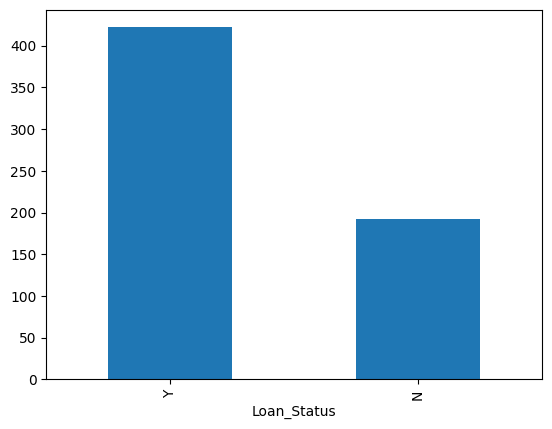

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

**Variable Categorisation:** **Categorical features**

These features have categories (Gender, Married, Self_Employed, Credit_History,Loan_Status)
Ordinal features:

Variables in categorical features having some order involved (Dependents, Education, Property_Area)
Numerical features

These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

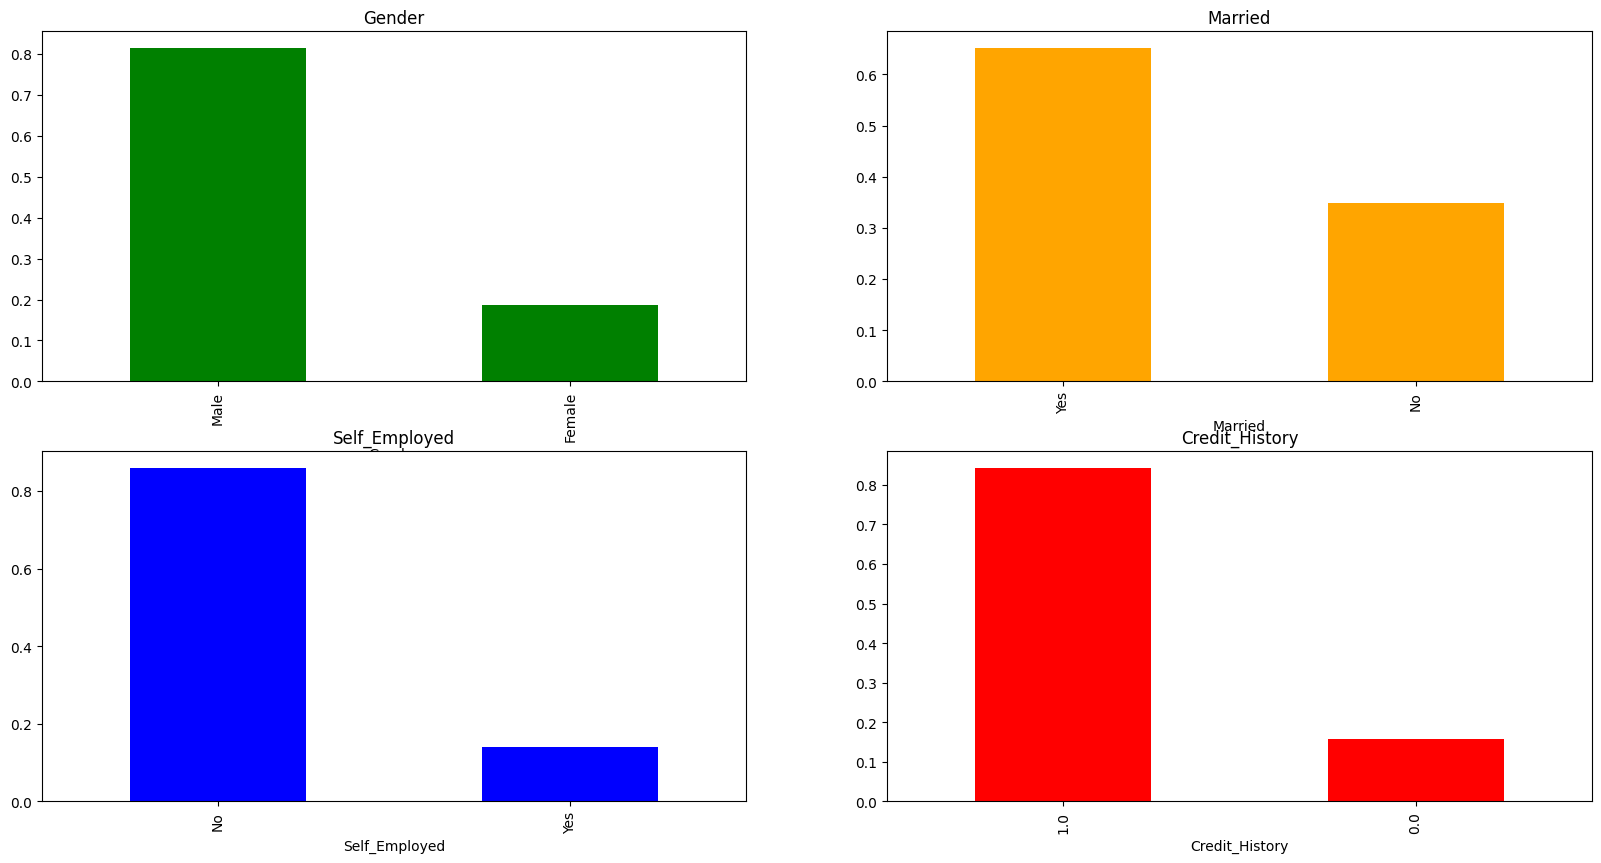

In [ ]:
plt.figure(1)
plt.subplot(221) # plt.subplot(nrows, ncols, plot_number)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender',color='green')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color='orange')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color='blue')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color='red')

plt.show()

**Plot Inference**:

1. 80% applicants in the dataset are male.
2. Around 65% of the applicants in the dataset are married.
3. Around 15% applicants in the dataset are self employed.
4. Around 85% applicants have repaid their debts.

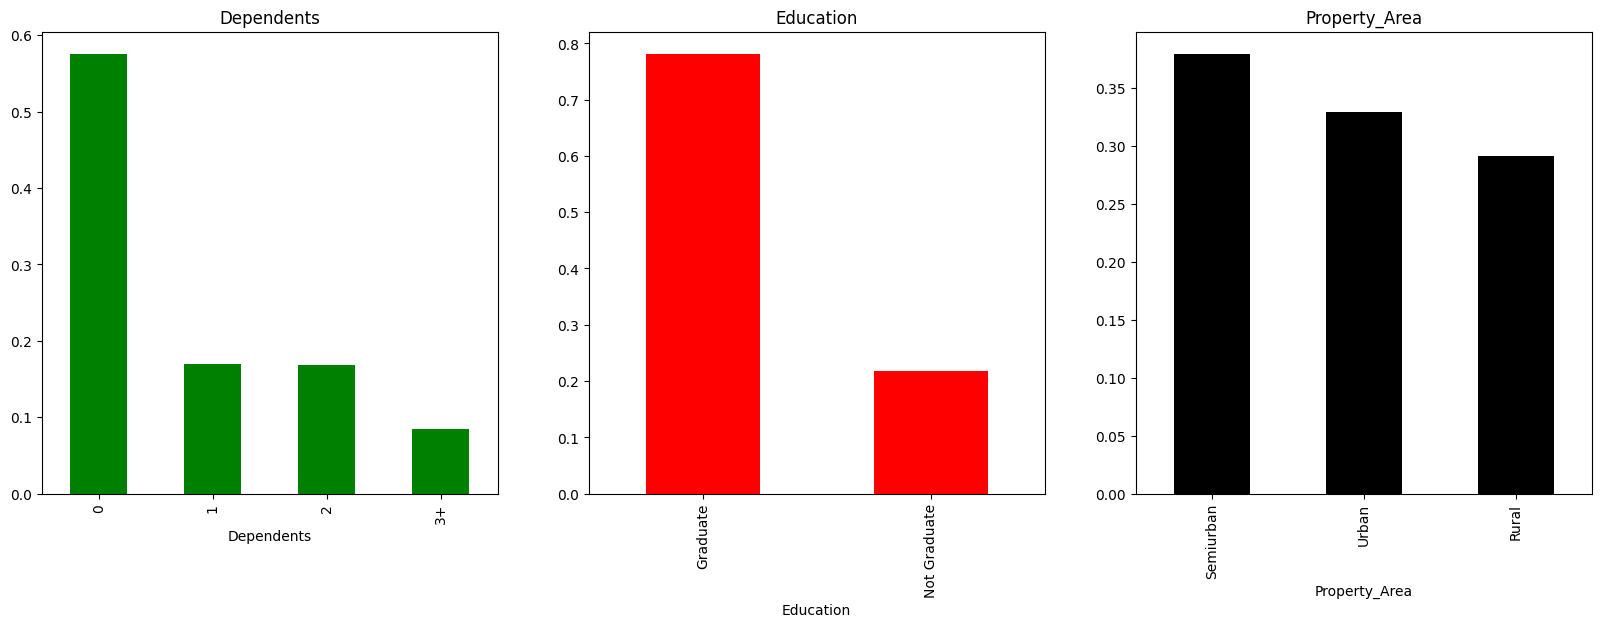

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (20,6), title='Dependents',color='green')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color='red')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color='black')

plt.show()

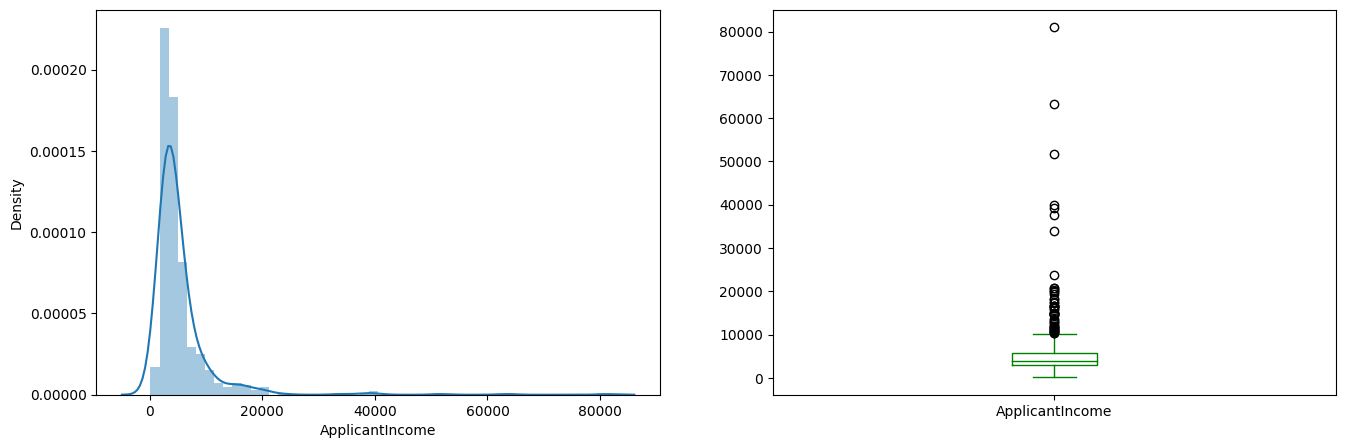

In [ ]:
plt.figure(1) # Distribution of Applicant income
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5),color='green')

plt.show()

Text(0.5, 0.98, '')

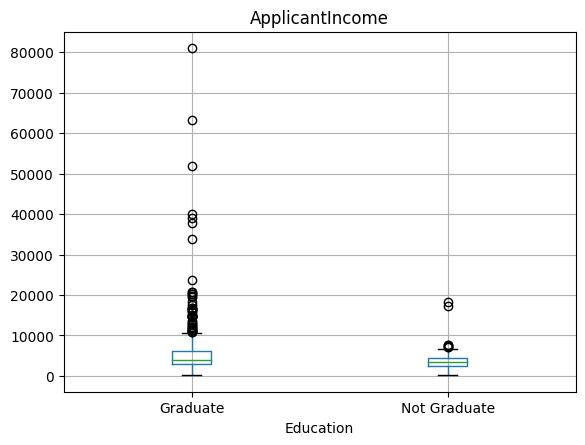

In [ ]:
train.boxplot(column="ApplicantIncome", by = "Education") # Applicant income by education
plt.suptitle("")

**Inference**:There are higher number of graduates with very high incomes, which are appearing to be the outliers.


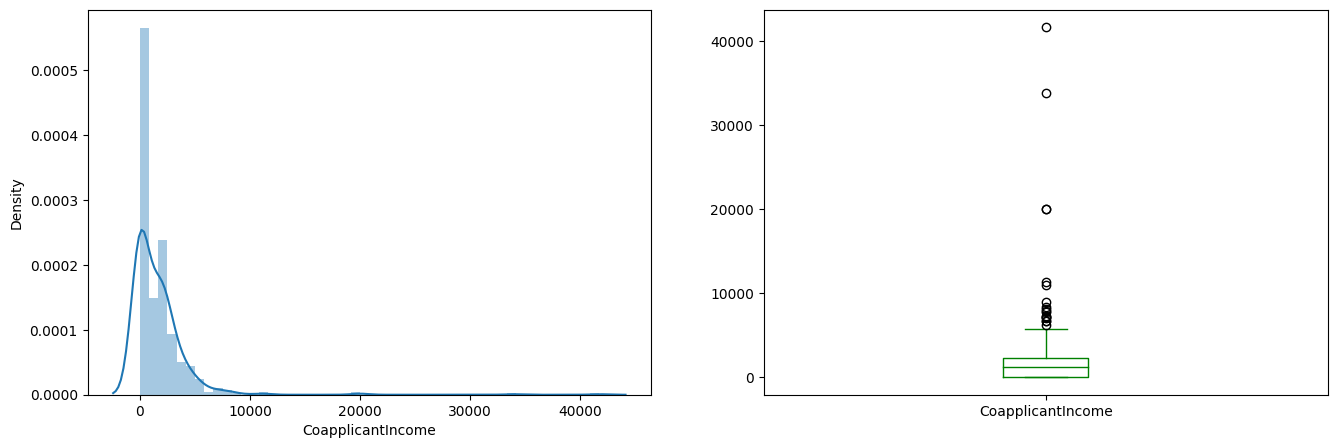

In [ ]:
plt.figure(1)# Distribution of co-applicant income

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5),color='green')
plt.show()

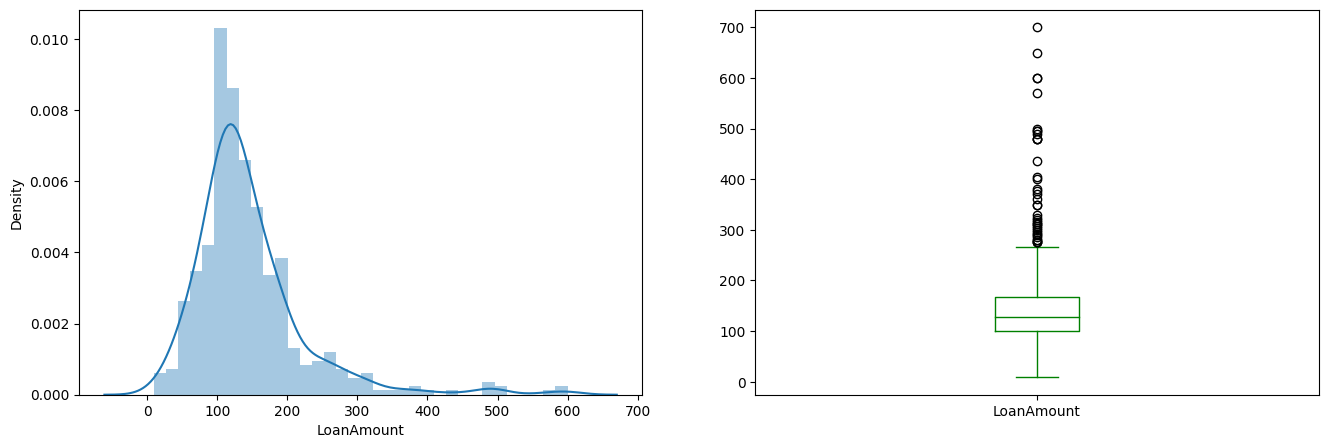

In [ ]:
plt.figure(1) # Distributon of Loan Amount
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5),color='green')

plt.show()

<Axes: xlabel='Gender'>

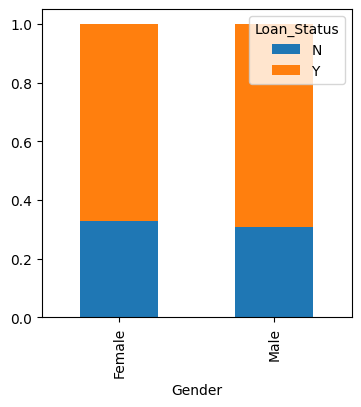

In [ ]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis =0).plot(kind="bar",stacked=True,figsize=(4,4))

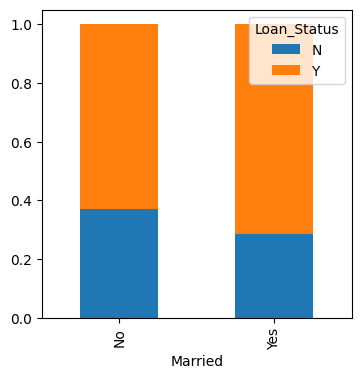

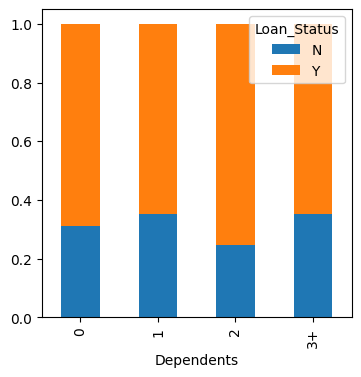

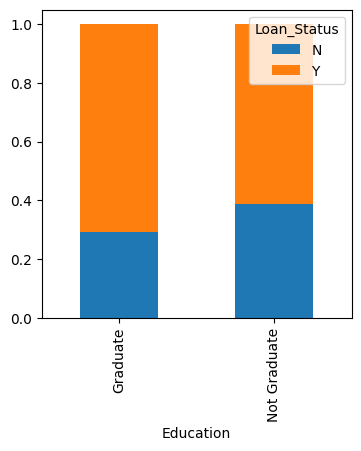

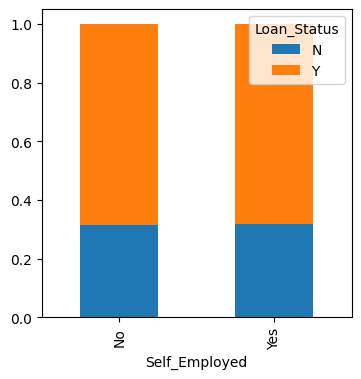

In [ ]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

**Inferences**

1.   proportion of marrid applicant is higher for the approved loans.
2. distribution of applicant with 1 or 3+ dependets is similar accross
  both the categories of Loan_Status
3. There is nothing significant we can infer from Self_Employed vs
     Loan_Status plot
4. List item



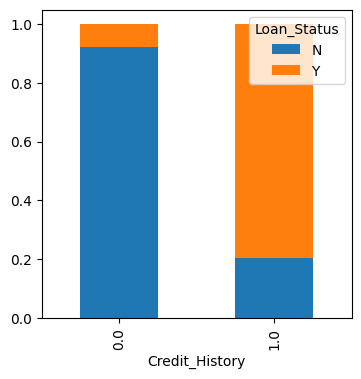

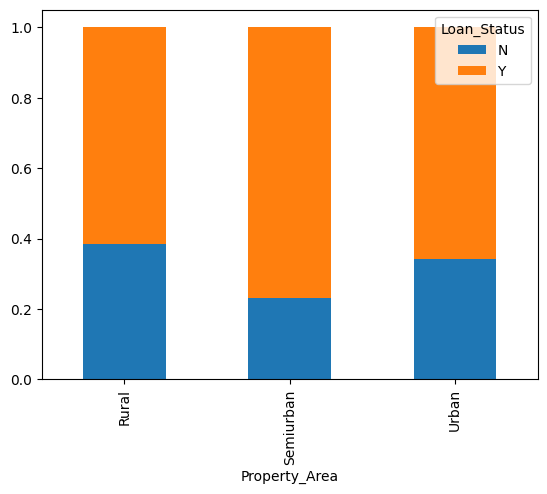

In [ ]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

<Axes: xlabel='Loan_Status'>

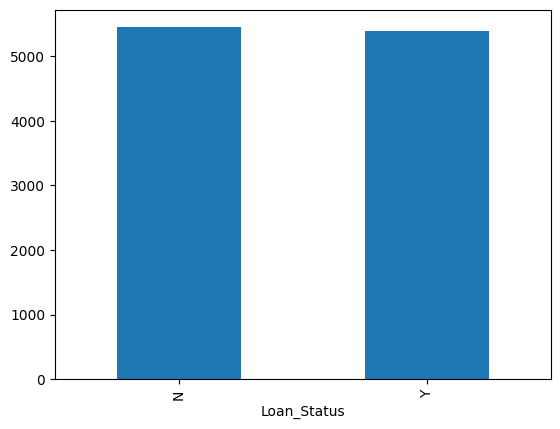

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

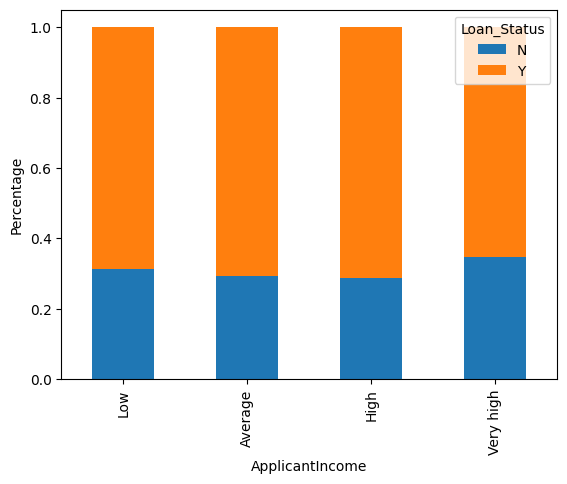

In [ ]:
bins=[0,2500,4000,6000,81000] # make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [ ]:
bins = [0,1000,3000,42000] # analyze the coapplicant income and loan amount variable
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

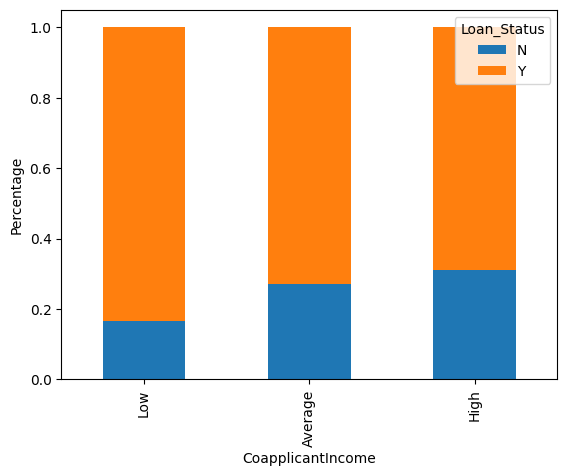

In [ ]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

**Inference:**It shows that coapplicants income is less the chances of loan approval are high. Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total_Income on the Loan_Status.

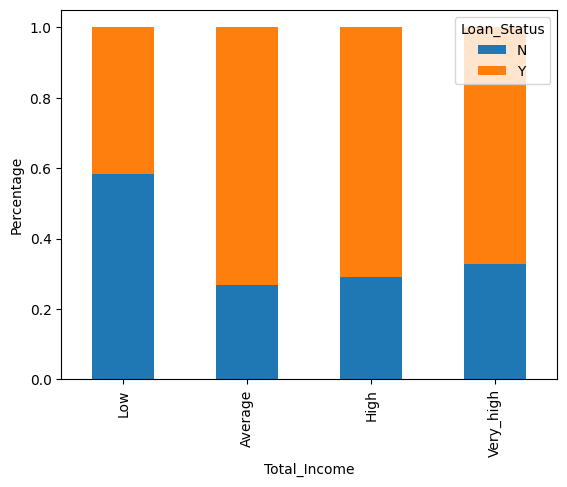

In [ ]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very_high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

**Inference**:We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income

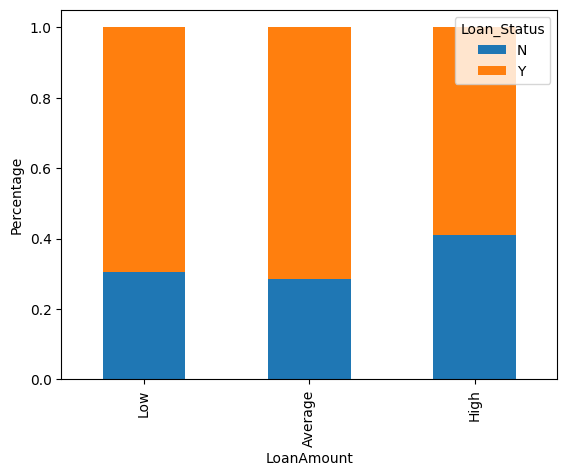

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income'], axis=1)

In [ ]:
train['Dependents'].replace('3+', 3,inplace=True)
train['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

**Note**:For understanding the correlation between all the numerical variables,we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

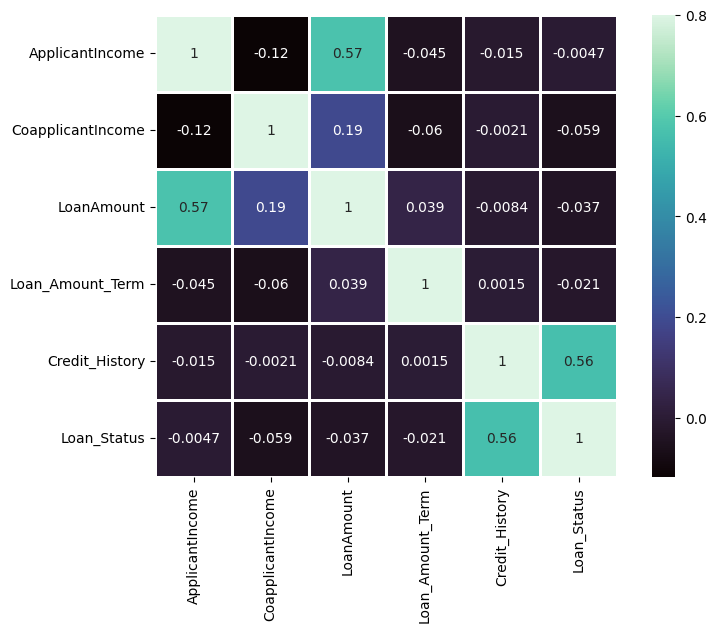

In [ ]:
matrix = train.corr(numeric_only=True) # Calculate the correlation matrix, excluding non-numeric columns.
f, ax = plt.subplots(figsize=(9,6)) # Create a heatmap to visualize the correlations.
sns.heatmap(matrix, vmax=.8, annot=True ,square=True, linewidths=1,cmap="mako");